In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error


In [2]:
def plot_2_error(y_true, y_predicted):
    residuals = (y_true - y_predicted)/y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black", alpha=0.25)
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red", alpha=0.25)
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

## Сложные преобразования и заполнения пропущенных данных

In [3]:
df = pd.read_csv('Diamants/dim_train.csv')
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
40450,2.09,Premium,H,SI1,61.1,56.0,18559,8.30,8.23,5.05
40451,1.33,Ideal,J,SI1,62.4,54.0,5857,7.04,7.07,4.40
40452,0.33,Very Good,F,VVS2,61.1,56.0,739,4.46,4.48,2.73
40453,0.23,Very Good,D,VVS2,62.5,58.0,530,3.92,3.95,2.46
40454,1.07,Premium,F,SI1,61.7,58.0,5042,6.54,6.61,4.06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
df['y']=np.where(df['y']>=15, df['y']/10,df['y'])
df['z']=np.where(df['z']>=15, df['z']/10,df['z'])
#df.sort_values(by=['y'])

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798351,61.752775,57.462279,3932.047831,5.732041,5.733814,3.538871
std,0.473726,1.435271,2.222987,3983.801692,1.120689,1.112633,0.695505
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,953.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2415.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5310.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,73.000000,18823.000000,10.740000,10.540000,8.060000


In [7]:
cat_features = ['cut','color']
axis_features = ['x','y','z']
num_features = ['carat','depth','table']

y = np.array(df.price)
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
OneHotEncoder(sparse_output=False).set_output(transform="pandas").fit_transform(df[cat_features])

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40451,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40453,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Расширенные преобразования в энкодоре

In [9]:
print(cat_features)
print(axis_features)
print(num_features)

['cut', 'color']
['x', 'y', 'z']
['carat', 'depth', 'table']


In [10]:
import category_encoders as ce

axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', StandardScaler())])

num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=0, max_iter=20)),
    ('scaler', StandardScaler())])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]

clarity_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])    
    
CT = ColumnTransformer([
        ("axis_transformer", axis_transformer, axis_features),
        ("num", num, num_features),
        # убрать быстую разряженную и затем добавить тип pandas
        ("cat", OneHotEncoder(sparse_output=False).set_output(transform="pandas"), cat_features),
        ("ordinal_map", clarity_transformer, ['clarity'])##### Обратить внимание
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head()


ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20,
                                                                   missing_values=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['carat', 'depth', 'table']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['cut', 'color']),
                                ('ordinal_map',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

,axis_transformer__x,axis_transformer__y,axis_transformer__z,axis_transformer__x^2,axis_transformer__x y,axis_transformer__x z,axis_transformer__y^2,axis_transformer__y z,axis_transformer__z^2,num__carat,...,cat__cut_Premium,cat__cut_Very Good,cat__color_D,cat__color_E,cat__color_F,cat__color_G,cat__color_H,cat__color_I,cat__color_J,ordinal_map__clarity
36492,-1.213868,-1.260193,-1.174758,-1.119791,-1.137749,-1.107874,-1.155046,-1.125917,-1.090004,-1.035266,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.571429
12932,-1.088649,-1.134076,-1.160317,-1.026653,-1.044628,-1.056063,-1.062020,-1.073934,-1.079325,-0.993009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.714286
2764,-0.847154,-0.836799,-0.871504,-0.838754,-0.835149,-0.850250,-0.831060,-0.846740,-0.857540,-0.802854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.285714
29533,-0.417829,-0.395389,-0.438285,-0.477800,-0.467956,-0.487527,-0.457850,-0.477790,-0.495578,-0.528185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.857143
9026,0.288767,0.253215,0.067137,0.191265,0.173940,0.079870,0.156174,0.062718,-0.028874,0.000023,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714


In [11]:
model = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge())
    ])

model.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('axis_transformer',
                                                  Pipeline(steps=[('missing_num',
                                                                   IterativeImputer(max_iter=20,
                                                                                    missing_values=0)),
                                                                  ('polynom',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['x', 'y', 'z']),
                                                 ('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   IterativeImputer(max_iter=20,
                                                                                    missing_values=0)),
                                                                  ('scaler',...
                                                 ('cat',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['cut', 'color']),
                                                 ('ordinal_map',
                                                  Pipeline(steps=[('missing_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ce',
                                                                   OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['clarity'])])),
                ('estimator', Ridge())])

In [12]:
model.score(X_train, y_train)

0.9188288087541487

In [13]:
model.score(X_test, y_test)

0.912433818784921

Max Error: -4,921
 
----------------------
   MAPE Error: 40.45
----------------------


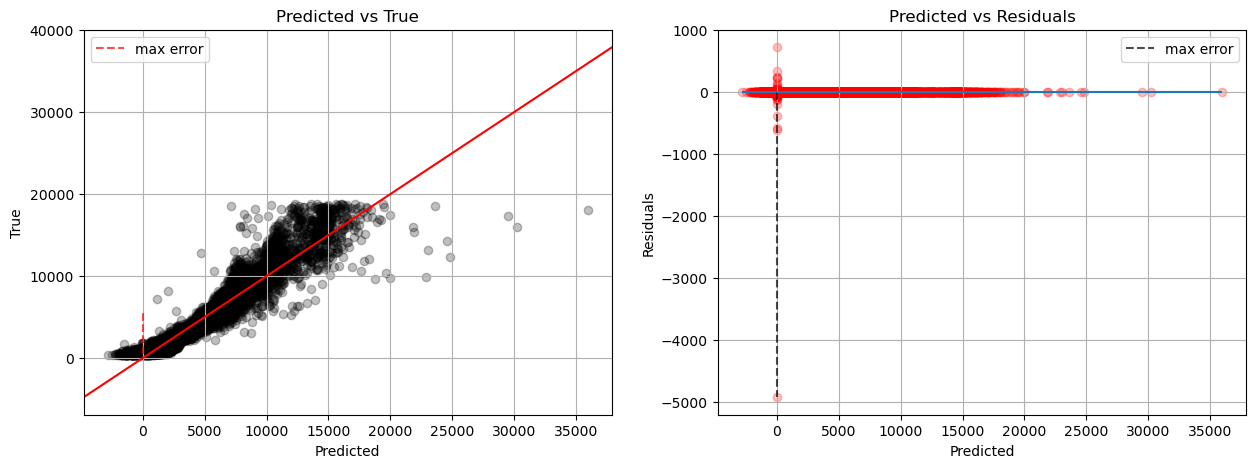

In [14]:
plot_2_error(y_test, model.predict(X_test))

<Axes: >

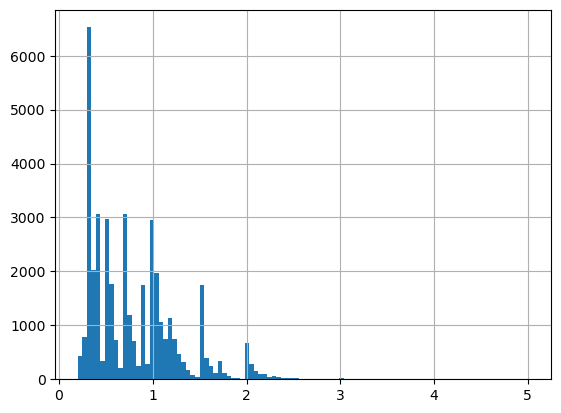

In [15]:
df['carat'].hist(bins=100)

In [16]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="normal")
)

model_target.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('axis_transformer',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        IterativeImputer(max_iter=20,
                                                                                                                         missing_values=0)),
                                                                                                       ('polynom',
                                                                                                        PolynomialFeatures(include_bias=False)),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['x',
                                                                                        'y',
                                                                                        'z']),
                                                                                      ('num',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        IterativeImputer(max_...
                                                                                      ('ordinal_map',
                                                                                       Pipeline(steps=[('missing_num',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('ce',
                                                                                                        OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                                                       ('scaler',
                                                                                                        MinMaxScaler())]),
                                                                                       ['clarity'])])),
                                                     ('estimator', Ridge())]),
                           transformer=QuantileTransformer(output_distribution='normal'))

Max Error: 2
 
----------------------
   MAPE Error: 12.68
----------------------


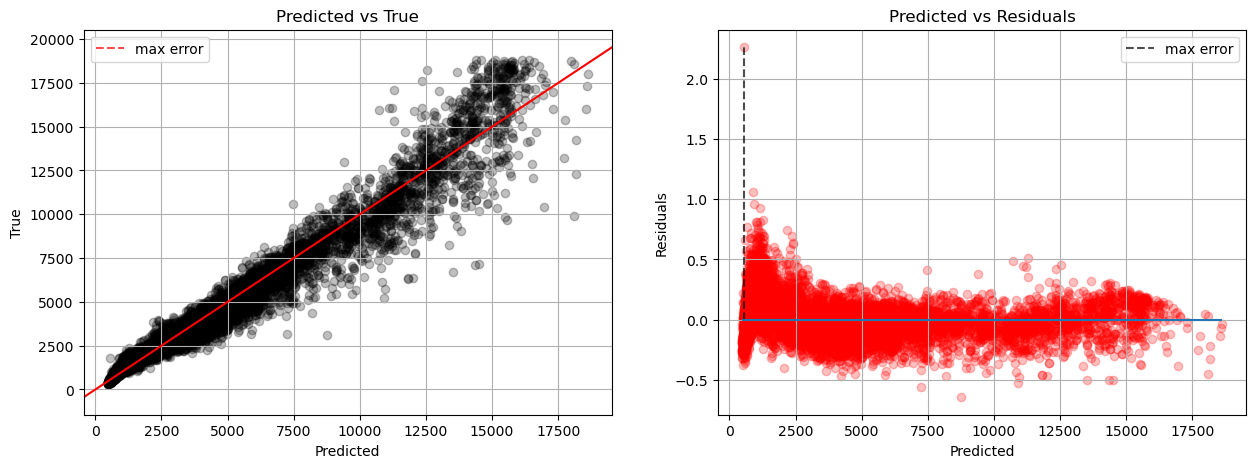

In [17]:
plot_2_error(y_test, model_target.predict(X_test))

Max Error: 4
 
----------------------
   MAPE Error: 11.39
----------------------


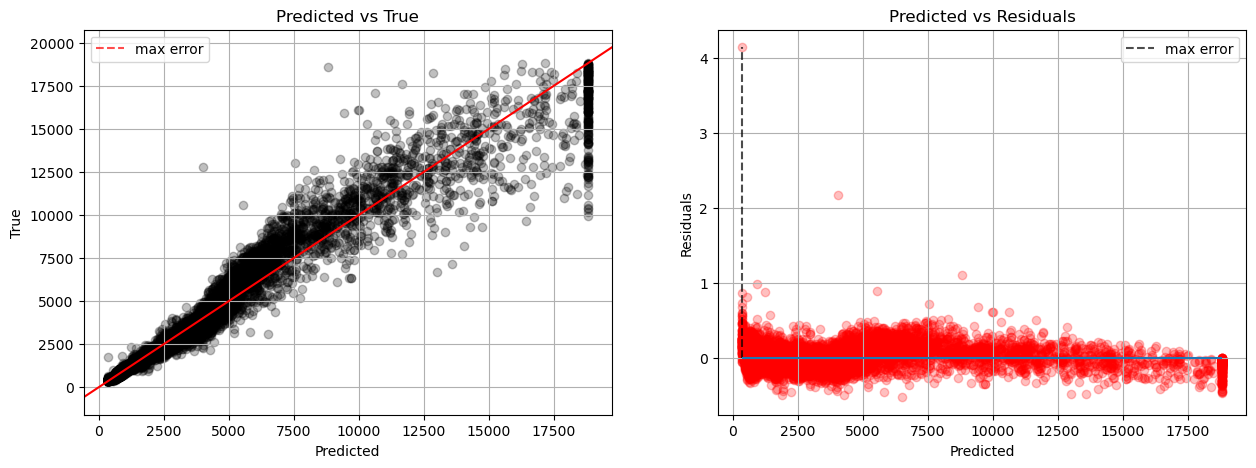

In [18]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                transformer=QuantileTransformer(n_quantiles=1000, output_distribution="uniform")
)

model_target.fit(X_train, y_train)
plot_2_error(y_test, model_target.predict(X_test))

Вспомнили датасет про стоимость домов? А может это решение :)

Max Error: 3
 
----------------------
   MAPE Error: 10.36
----------------------


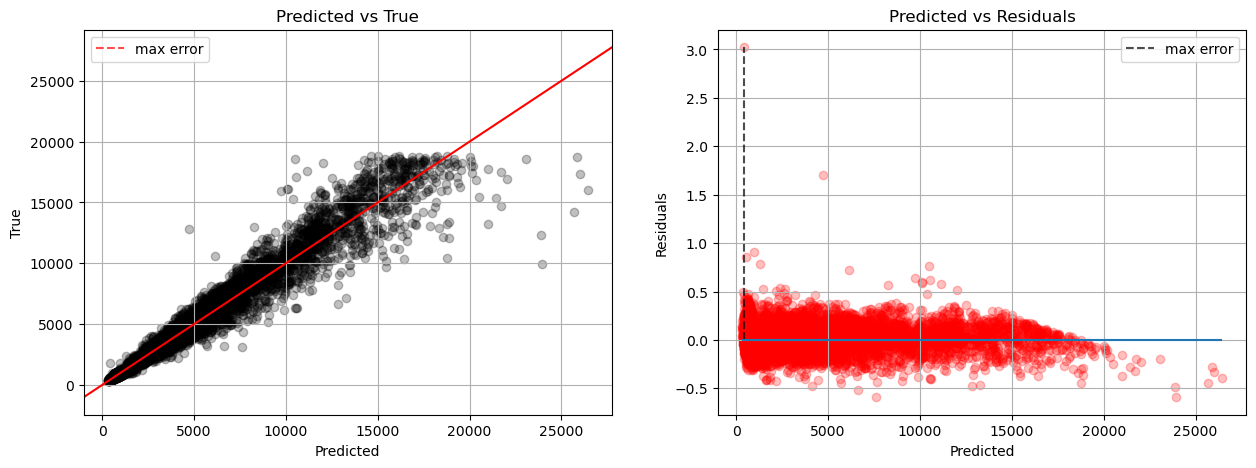

In [19]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                transformer=PowerTransformer()
)

model_target.fit(X_train, y_train)
plot_2_error(y_test, model_target.predict(X_test))

In [20]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', Ridge())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe                 

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('axis_transformer',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         IterativeImputer(max_iter=20,
                                                                                                                                          missing_values=0)),
                                                                                                                        ('polynom',
                                                                                                                         PolynomialFeatures(include_bias=False)),
                                                                                                                        ('scaler',
                                                                                                                         StandardScaler())]),
                                                                                                        ['x',
                                                                                                         'y',
                                                                                                         'z']),
                                                                                                       ('num',
                                                                                                        Pipelin...
                                                                                                        OneHotEncoder(sparse_output=False),
                                                                                                        ['cut',
                                                                                                         'color']),
                                                                                                       ('ordinal_map',
                                                                                                        Pipeline(steps=[('missing_num',
                                                                                                                         SimpleImputer(strategy='most_frequent')),
                                                                                                                        ('ce',
                                                                                                                         OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                                                                  'data_type': dtype('O'),
                                                                                                                                                  'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                                                                        ('scaler',
                                                                                                                         MinMaxScaler())]),
                                                                                                        ['clarity'])])),
                                                                      ('estimator',
                                                                       Ridge())]),
                              

In [21]:

param_grid = [
    {'model__regressor__estimator':[Ridge(), KNeighborsRegressor()],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform")]}
]

scores='neg_mean_absolute_percentage_error'
grid = GridSearchCV(model_pipe, n_jobs=1, param_grid=param_grid, scoring=scores)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                StandardScaler())]),
                                                                                                                               ['x',
                                                                                                                                '...
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                                                                                                               ('scaler',
                                                                                                                                                MinMaxScaler())]),
                                                                                                                               ['clarity'])])),
                                                                                             ('estimator',
                                                                                              Ridge())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=1,
             param_grid=[{'model__regressor__estimator': [Ridge(),
                                                          KNeighborsRegressor()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [22]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.106427,0.100419,0.107666,0.093299
std_fit_time,0.007507,0.002514,0.005328,0.002864
mean_score_time,0.018792,0.020025,0.180085,0.148961
std_score_time,0.001188,0.000311,0.057152,0.024411
param_model__regressor__estimator,Ridge(),Ridge(),KNeighborsRegressor(),KNeighborsRegressor()
param_model__transformer,PowerTransformer(),QuantileTransformer(),PowerTransformer(),QuantileTransformer()
params,"{'model__regressor__estimator': Ridge(), 'mode...","{'model__regressor__estimator': Ridge(), 'mode...",{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...
split0_test_score,-0.104211,-0.115603,-0.131735,-0.132817
split1_test_score,-0.107329,-0.115681,-0.133686,-0.134627
split2_test_score,-0.104586,-0.110718,-0.130088,-0.13095


In [23]:
param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': [3,5],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform")]},
    {'model__regressor__preproc__num__scaler': [StandardScaler(), RobustScaler()],
     'model__regressor__preproc__ordinal_map__ce':[ce.OrdinalEncoder(mapping=clarity_map), TargetEncoder()],
     'model__regressor__estimator':[Ridge()],
     'model__regressor__estimator__alpha': [0.1,1],
     'model__transformer':[PowerTransformer(),QuantileTransformer(n_quantiles=1000, output_distribution="uniform")]},
]
    
scores='neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model_pipe, n_jobs=1, param_grid=param_grid, scoring=scores)
grid_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('axis_transformer',
                                                                                                                               Pipeline(steps=[('missing_num',
                                                                                                                                                IterativeImputer(max_iter=20,
                                                                                                                                                                 missing_values=0)),
                                                                                                                                               ('polynom',
                                                                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                                                                               ('scaler',
                                                                                                                                                StandardScaler())]),
                                                                                                                               ['x',
                                                                                                                                '...
                          'model__regressor__preproc__num__scaler': [StandardScaler(),
                                                                     RobustScaler()],
                          'model__regressor__preproc__ordinal_map__ce': [OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}]),
                                                                         TargetEncoder()],
                          'model__transformer': [PowerTransformer(),
                                                 QuantileTransformer()]}],
             scoring='neg_mean_absolute_percentage_error')

In [24]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,4,8,16,12,6,10,5,9,14,18,13,17,11,7,19,15,2,3,0,1
mean_fit_time,0.101575,0.103666,0.108887,0.102064,0.095058,0.094113,0.091147,0.092222,0.094004,0.104254,0.091539,0.101445,0.082728,0.081749,0.08961,0.082706,0.104518,0.092,0.108049,0.097493
std_fit_time,0.001641,0.001861,0.003383,0.002393,0.003631,0.001124,0.001069,0.000513,0.003161,0.001166,0.001567,0.000607,0.00081,0.001121,0.002826,0.001639,0.00122,0.001459,0.006357,0.001955
mean_score_time,0.017074,0.017096,0.018239,0.016905,0.015045,0.014832,0.017306,0.017195,0.014909,0.016569,0.017441,0.018709,0.015056,0.015109,0.016407,0.01509,0.165032,0.134017,0.149159,0.183982
std_score_time,0.000235,0.000093,0.000794,0.000193,0.000068,0.000135,0.000097,0.000095,0.000234,0.000159,0.000112,0.000109,0.000198,0.000121,0.000472,0.000211,0.036836,0.012043,0.033386,0.016402
param_model__regressor__estimator,Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),Ridge(alpha=0.1),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_model__regressor__estimator__n_neighbors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3,3
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),PowerTransformer(),PowerTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),QuantileTransformer(),PowerTransformer(),QuantileTransformer(),PowerTransformer(),QuantileTransformer()
param_model__regressor__estimator__alpha,0.1,0.1,1,1,0.1,0.1,0.1,0.1,1,1,1,1,0.1,0.1,1,1,NaN,NaN,NaN,NaN
param_model__regressor__preproc__num__scaler,StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),RobustScaler(),StandardScaler(),RobustScaler(),StandardScaler(),NaN,NaN,NaN,NaN
param_model__regressor__preproc__ordinal_map__ce,"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",TargetEncoder(),TargetEncoder(),"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",TargetEncoder(),TargetEncoder(),"OrdinalEncoder(mapping=[{'col': 'clarity', 'da...","OrdinalEncoder(mapping=[{'col': 'clarity', 'da...",TargetEncoder(),TargetEncoder(),TargetEncoder(),TargetEncoder(),NaN,NaN,NaN,NaN


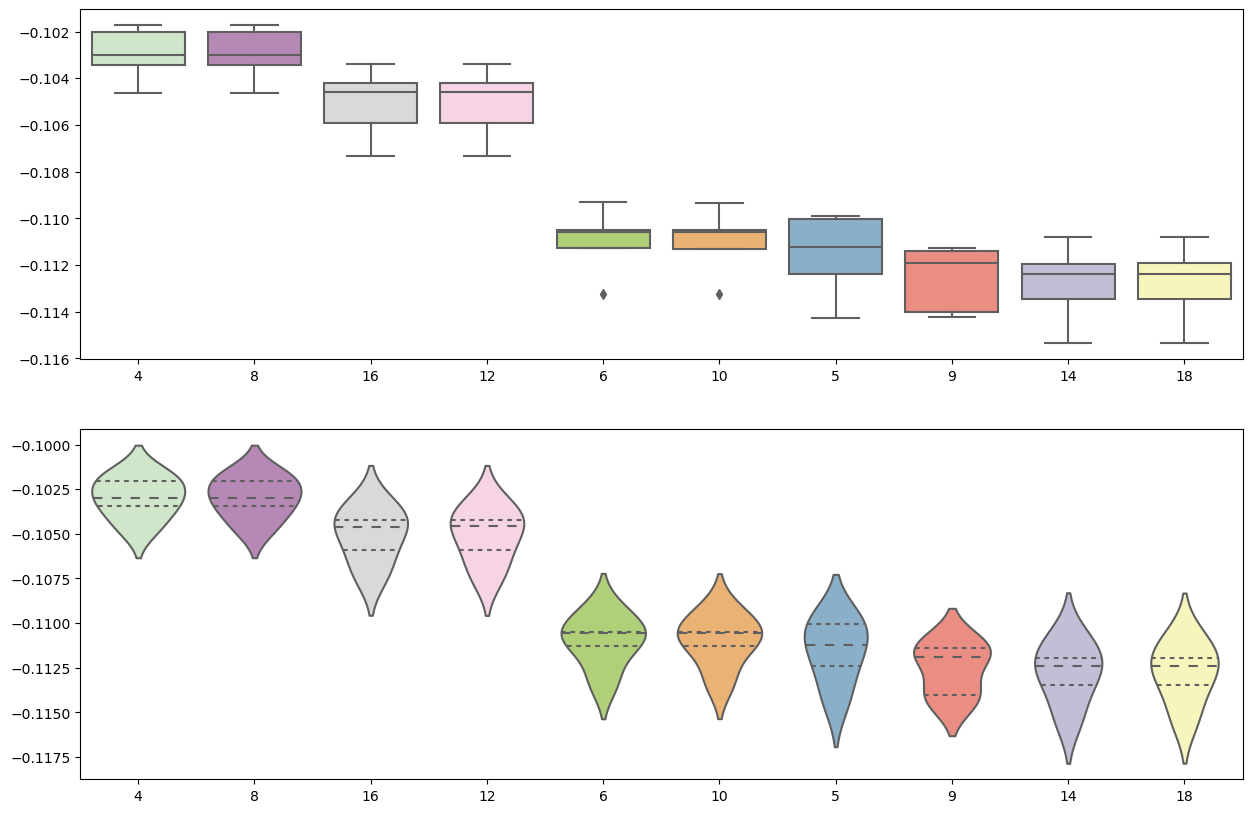

In [25]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
f, ax = plt.subplots(2,1,figsize=(15, 10))
sns.boxplot(data=tabl,  linewidth=1.5, palette="Set3_r", ax=ax[0]);
sns.violinplot(data=tabl, inner="quart", linewidth=1.5, palette="Set3_r", ax=ax[1]);

In [26]:
final = grid_2.best_estimator_

Max Error: 3
 
----------------------
   MAPE Error: 10.15
----------------------


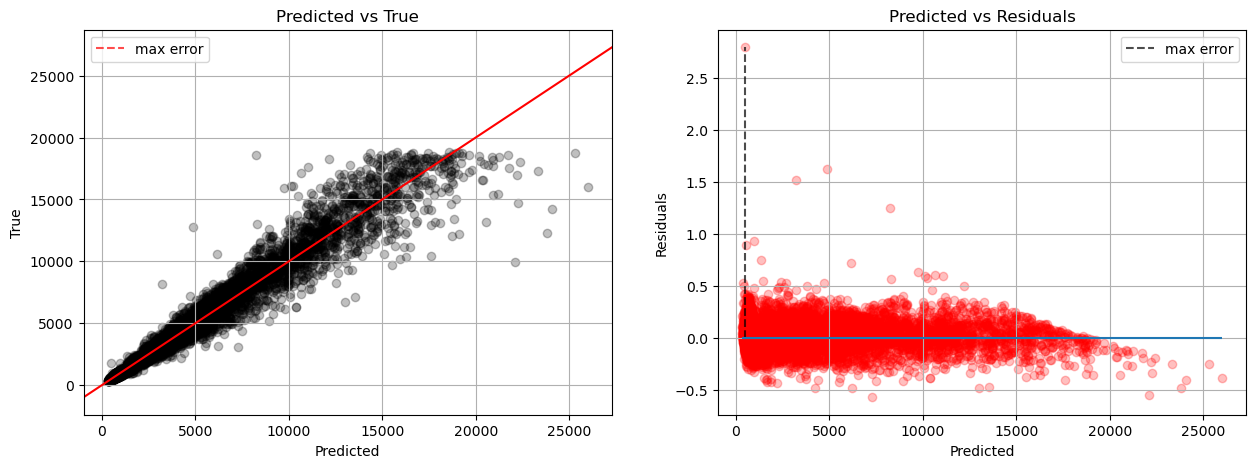

In [27]:
final.fit(X_train, y_train)
plot_2_error(y_test, final.predict(X_test))